<a href="https://colab.research.google.com/github/bimaputra1/ds-for-marketing-analytics/blob/Dev-1/1_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science for Marketing Analytics
by: **Bima Putra Pratama**
_____

## Data Exploration

Pada sesi kali ini kita akan melakukan beberapa teknik persiapan data dan eksplorasi data menggunakan library pandas dan juga seaborn. Tujuan dari sesi ini kita dapat melakukan pemanggilan data, melakukan pembersihan data dan juga melakukan visualisasi data.

Data set yang di gunakan pada workshop kali merupakan data toko retail II dari UCI Repository yang sudah di modifikasi. Sedangkan data asli yang akan kita gunakan dapat diakses melalui link [disini](https://archive.ics.uci.edu/ml/datasets/Online+Retail+II). Data yang akan kita gunakan adalah data transaksi pada tahun 2010 dan 2011 dari sebuah toko di Inggris. Selain itu juga kita memiliki satu tabel yang berisi demografi umur dan gender dari tiap-tiap pelanngan yang berbelanja di toko tersebut.

Library yang dibutuhkan untuk latihan kali ini adalah sebagai berikut:

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set(style="darkgrid")

### 1. Import Data

Pada bagian ini kita akan melakukan pemanggilan data dan masing-masing data akan disimpan ke dalam data frame. Selanjutnya kita akan melihat contoh data yang ada di dalam data frame tersebut.

In [4]:
# Import Dataset

## transaksi 2010
df_10 = pd.read_csv('data/transaction_2010.csv')

## transaksi 2011
df_11 = pd.read_csv('data/transaction_2011.csv')

## demografi pelanngan
df_cust = pd.read_csv('data/customers.csv')

/Users/pratamab/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# Checking Dataset

print('\n----- transaksi 2010 -----\n')
display(df_10.head(10))

print('\n----- transaksi 2011 -----\n')
display(df_11.head(10))

print('\n----- customer data -----\n')
display(df_cust.head(10))


----- transaksi 2010 -----



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,493446,10002,INFLATABLE POLITICAL GLOBE,3,4/1/10 14:00,0.85,17807,United Kingdom
1,493878,10002,INFLATABLE POLITICAL GLOBE,12,8/1/10 9:08,0.85,14769,United Kingdom
2,494390,10002,INFLATABLE POLITICAL GLOBE,110,14/1/10 10:04,0.85,18041,United Kingdom
3,494439,10002,INFLATABLE POLITICAL GLOBE,30,14/1/10 12:30,0.85,12931,United Kingdom
4,494644,10002,INFLATABLE POLITICAL GLOBE,3,17/1/10 12:12,0.85,16595,United Kingdom
5,494987,10002,INFLATABLE POLITICAL GLOBE,12,20/1/10 11:31,0.85,18223,United Kingdom
6,495183,10002,INFLATABLE POLITICAL GLOBE,12,21/1/10 13:48,0.85,15296,United Kingdom
7,495227,10002,INFLATABLE POLITICAL GLOBE,6,21/1/10 19:11,0.85,14713,United Kingdom
8,495382,10002,INFLATABLE POLITICAL GLOBE,10,24/1/10 13:55,0.85,14522,United Kingdom
9,495534,10002,INFLATABLE POLITICAL GLOBE,12,25/1/10 15:36,0.85,14032,United Kingdom



----- transaksi 2011 -----



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,540277,10002,INFLATABLE POLITICAL GLOBE,60,6/1/11 12:18,0.85,14258,United Kingdom
1,540732,10002,INFLATABLE POLITICAL GLOBE,12,11/1/11 10:19,0.85,16122,United Kingdom
2,540798,10002,INFLATABLE POLITICAL GLOBE,12,11/1/11 12:11,0.85,17365,United Kingdom
3,541094,10002,INFLATABLE POLITICAL GLOBE,11,13/1/11 13:36,0.85,13246,United Kingdom
4,541248,10002,INFLATABLE POLITICAL GLOBE,1,16/1/11 13:04,0.85,12748,United Kingdom
5,541262,10002,INFLATABLE POLITICAL GLOBE,6,16/1/11 15:50,0.85,18069,United Kingdom
6,541615,10002,INFLATABLE POLITICAL GLOBE,6,20/1/11 10:43,0.85,16395,United Kingdom
7,541698,10002,INFLATABLE POLITICAL GLOBE,18,20/1/11 19:16,0.85,14713,United Kingdom
8,541849,10002,INFLATABLE POLITICAL GLOBE,2,23/1/11 13:34,0.85,13230,United Kingdom
9,542096,10002,INFLATABLE POLITICAL GLOBE,2,25/1/11 12:52,0.85,17236,United Kingdom



----- customer data -----



,Cust_ID,Age,Gender
0,13001,49,MALE
1,13276,21,FEMALE
2,13439,37,MALE
3,14176,44,MALE
4,13134,45,MALE
5,14175,49,MALE
6,12842,36,FEMALE
7,14173,34,FEMALE
8,13357,41,FEMALE
9,14167,21,FEMALE


### 2. Pemrosesan Data

#### Eksplorasi Data Transaksi 2010

***Memahami tipe data***

Kita perlu mengetahui tipe data dari data-data yang kita gunakan apakah sudah sesuai dengan yang di harapkan atau belum.

In [6]:
# Mendapatkan informasi dari dataframe
df_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349173 entries, 0 to 349172
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      349173 non-null  object 
 1   StockCode    349173 non-null  object 
 2   Description  349173 non-null  object 
 3   Quantity     349173 non-null  int64  
 4   InvoiceDate  349173 non-null  object 
 5   Price        349173 non-null  float64
 6   Customer ID  349173 non-null  int64  
 7   Country      349173 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 21.3+ MB


Dari hasil perintah diatas kita dapat mengetahui jumlahh row dan kolom kita, tipe data dari setiap kolom  dan juga memory yang di gunakan. Selain itu kita juga bisa mengidentifikasi berapa jumlah dari null value pada data kita.

Berdasarkan dari hasil tersebut kita perlu melakukan perubahan tipe data untuk InvoiceDate menjadi tipe tanggal dan waktu serta Customer ID menjadi tipe string.

In [7]:
# Merubah tipe data
df_10['InvoiceDate'] = pd.to_datetime(df_10['InvoiceDate'])
df_10['Customer ID'] = df_10['Customer ID'].astype(str)

In [8]:
# Pengecekan tipe data
df_10.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID            object
Country                object
dtype: object

Data set kita sudah sesuai dengan yang kita perlukan

***Statistik Deskriptif***

Desktriptive statistik bermanfaat untuk melihat bagaimana distribusi data yang kita miliki. Pandas memiliki fungsi yang bisa dengan mudah menampilkan statistik deskriptif dari data numeric yang kita miliki

In [9]:
# statistik deskriptif
df_10.describe().round(2)

,Quantity,Price
count,349173.00,349173.00
mean,11.43,3.03
std,69.32,4.63
min,-9360.00,0.00
25%,2.00,1.25
50%,4.00,1.95
75%,12.00,3.75
max,10000.00,295.00


Dari melihat sekilas hasil fungsi ***decribe()*** tersebut kita bisa melihat jumlah data, rata-rata, median, nilai minimal dan maksimal/

Selain itu kita bisa melihat ada Quantity yang nilainya tidak benar yaity kurang dari 1. Selain itu juga ada price yang nilainya 0. Oleh karena itu kita perlu memperbaiki data set kita. 

In [10]:
# Identifikasi data quantity dan price
print('\nContoh Data Nilai Quantity < 1\n')
display(df_10[df_10['Quantity']<0].head())

print('\nContoh Data Nilai Price = 0 \n')
display(df_10[df_10['Price']<= 0].head())


Contoh Data Nilai Quantity < 1



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
37,C503527,10002,INFLATABLE POLITICAL GLOBE,-200,2010-01-04 13:13:00,0.72,16019,United Kingdom
60,C507219,10002,INFLATABLE POLITICAL GLOBE,-1,2010-06-05 19:14:00,0.85,14713,United Kingdom
65,C508132,10002,INFLATABLE POLITICAL GLOBE,-400,2010-05-13 10:54:00,0.72,12931,United Kingdom
66,C508134,10002,INFLATABLE POLITICAL GLOBE,-400,2010-05-13 10:56:00,0.72,12931,United Kingdom
67,C508140,10002,INFLATABLE POLITICAL GLOBE,-200,2010-05-13 10:58:00,0.72,12931,United Kingdom



Contoh Data Nilai Price = 0 



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
19312,512609,20914,SET/5 RED SPOTTY LID GLASS BOWLS,2,2010-06-17 10:12:00,0.0,14045,United Kingdom
73093,494607,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-15 12:43:00,0.0,16858,United Kingdom
83797,500073,21662,VINTAGE GLASS COFFEE CADDY,1,2010-04-03 11:44:00,0.0,13047,United Kingdom
94814,511902,21765,HANGING METAL BIRD BATH,1,2010-11-06 11:12:00,0.0,12748,United Kingdom
101571,531361,21843,RED RETROSPOT CAKE STAND,2,2010-07-11 14:26:00,0.0,12820,United Kingdom


Selanjutnya kita perlu membersihkan data dari nilai yang tidak benar tersebut

In [11]:
# Mengambil data yang memiliki Quantity > 0 dan Price > 0

df_10 = df_10.loc[(df_10['Quantity'] > 0) &
                  (df_10['Price'] > 0)]

# Pengecekan hasil
df_10.describe()

,Quantity,Price
count,341870.000000,341870.000000
mean,11.945816,2.992629
std,67.574345,4.426881
min,1.000000,0.030000
25%,2.000000,1.250000
50%,4.000000,1.950000
75%,12.000000,3.750000
max,10000.000000,295.000000


**Congrats!** Sekarang data kita sudah memiliki data trabsaksi 2010 yang sudah bersih dari data yang tidak seharusnya. Selanjutnya kita akan melakukan explorasi data untuk transaksi tahun 2011

****Menambah Kolom Total Sales****

Selanjutnya kita akan menambahkan kolom baru yang berisi total sales dari tiap produk dan transaksi

In [12]:
df_10['total_sales'] = df_10['Quantity']*df_10['Price']

In [13]:
df_10.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total_sales
0,493446,10002,INFLATABLE POLITICAL GLOBE,3,2010-04-01 14:00:00,0.85,17807,United Kingdom,2.55
1,493878,10002,INFLATABLE POLITICAL GLOBE,12,2010-08-01 09:08:00,0.85,14769,United Kingdom,10.20
2,494390,10002,INFLATABLE POLITICAL GLOBE,110,2010-01-14 10:04:00,0.85,18041,United Kingdom,93.50
3,494439,10002,INFLATABLE POLITICAL GLOBE,30,2010-01-14 12:30:00,0.85,12931,United Kingdom,25.50
4,494644,10002,INFLATABLE POLITICAL GLOBE,3,2010-01-17 12:12:00,0.85,16595,United Kingdom,2.55


#### Eksplorasi Data Transaksi 2011

***Memahami tipe data***

Kita perlu mengetahui tipe data dari data-data yang kita gunakan apakah sudah sesuai dengan yang di harapkan atau belum.

In [14]:
# Mendapatkan informasi dari dataframe
df_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336763 entries, 0 to 336762
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      336763 non-null  object 
 1   StockCode    336763 non-null  object 
 2   Description  336763 non-null  object 
 3   Quantity     336763 non-null  int64  
 4   InvoiceDate  336763 non-null  object 
 5   Price        336763 non-null  float64
 6   Customer ID  336763 non-null  int64  
 7   Country      336763 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 20.6+ MB


Dari hasil perintah diatas kita dapat mengetahui jumlahh row dan kolom kita, tipe data dari setiap kolom  dan juga memory yang di gunakan. Selain itu kita juga bisa mengidentifikasi berapa jumlah dari null value pada data kita.

Berdasarkan dari hasil tersebut kita perlu melakukan perubahan tipe data untuk InvoiceDate menjadi tipe tanggal dan waktu serta Customer ID menjadi tipe string.

In [15]:
# Merubah tipe data
df_11['InvoiceDate'] = pd.to_datetime(df_11['InvoiceDate'])
df_11['Customer ID'] = df_11['Customer ID'].astype(str)

In [16]:
# Pengecekan tipe data
df_11.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID            object
Country                object
dtype: object

Data set kita sudah sesuai dengan yang kita perlukan

***Statistik Deskriptif***

Desktriptive statistik bermanfaat untuk melihat bagaimana distribusi data yang kita miliki. Pandas memiliki fungsi yang bisa dengan mudah menampilkan statistik deskriptif dari data numeric yang kita miliki

In [17]:
# statistik deskriptif
df_11.describe().round(2)

,Quantity,Price
count,336763.00,336763.00
mean,11.15,2.87
std,271.97,4.42
min,-80995.00,0.00
25%,2.00,1.25
50%,4.00,1.85
75%,12.00,3.75
max,80995.00,649.50


Dari melihat sekilas hasil fungsi ***decribe()*** tersebut kita bisa melihat jumlah data, rata-rata, median, nilai minimal dan maksimal/

Selain itu kita bisa melihat ada Quantity yang nilainya tidak benar yaity kurang dari 1. Selain itu juga ada price yang nilainya 0. Oleh karena itu kita perlu memperbaiki data set kita. 

In [18]:
# Identifikasi data quantity dan price
print('\nContoh Data Nilai Quantity < 1\n')
display(df_11[df_11['Quantity']<0].head())

print('\nContoh Data Nilai Price = 0 \n')
display(df_11[df_11['Price']<= 0].head())


Contoh Data Nilai Quantity < 1



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
168,C558716,10133,COLOURING PENCILS BROWN TUBE,-10,2011-01-07 13:22:00,0.42,17888,United Kingdom
291,C571707,10135,COLOURING PENCILS BROWN TUBE,-1,2011-10-18 15:33:00,1.25,14056,United Kingdom
344,C565044,11001,ASSTD DESIGN RACING CAR PEN,-180,2011-08-31 17:02:00,1.27,12931,United Kingdom
351,C568412,11001,ASSTD DESIGN RACING CAR PEN,-1,2011-09-27 10:54:00,1.69,14456,United Kingdom
355,C569682,11001,ASSTD DESIGN RACING CAR PEN,-2,2011-05-10 14:33:00,1.69,15351,United Kingdom



Contoh Data Nilai Price = 0 



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
31078,572893,21208,PASTEL COLOUR HONEYCOMB FAN,5,2011-10-26 14:36:00,0.0,18059,United Kingdom
81731,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113,United Kingdom
82171,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239,United Kingdom
82532,574175,22065,CHRISTMAS PUDDING TRINKET POT,12,2011-03-11 11:47:00,0.0,14110,United Kingdom
87076,575579,22089,PAPER BUNTING VINTAGE PAISLEY,24,2011-10-11 11:49:00,0.0,13081,United Kingdom


Selanjutnya kita perlu membersihkan data dari nilai yang tidak benar tersebut

In [19]:
# Mengambil data yang memiliki Quantity > 0 dan Price > 0

df_11 = df_11.loc[(df_11['Quantity'] > 0) &
                  (df_11['Price'] > 0)]

# Pengecekan hasil
df_11.describe()

,Quantity,Price
count,330073.000000,330073.000000
mean,12.063810,2.841258
std,195.679183,4.254411
min,1.000000,0.040000
25%,2.000000,1.250000
50%,4.000000,1.790000
75%,12.000000,3.750000
max,80995.000000,649.500000


****Menambah Kolom Total Sales****

Selanjutnya kita akan menambahkan kolom baru yang berisi total sales dari tiap produk dan transaksi

In [20]:
df_11['total_sales'] = df_11['Quantity']*df_11['Price']

In [21]:
df_11.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total_sales
0,540277,10002,INFLATABLE POLITICAL GLOBE,60,2011-06-01 12:18:00,0.85,14258,United Kingdom,51.00
1,540732,10002,INFLATABLE POLITICAL GLOBE,12,2011-11-01 10:19:00,0.85,16122,United Kingdom,10.20
2,540798,10002,INFLATABLE POLITICAL GLOBE,12,2011-11-01 12:11:00,0.85,17365,United Kingdom,10.20
3,541094,10002,INFLATABLE POLITICAL GLOBE,11,2011-01-13 13:36:00,0.85,13246,United Kingdom,9.35
4,541248,10002,INFLATABLE POLITICAL GLOBE,1,2011-01-16 13:04:00,0.85,12748,United Kingdom,0.85


**Congrats!** Sekarang data kita sudah memiliki data trabsaksi 2011 yang sudah bersih dari data yang tidak seharusnya.

****Menggabungkan data customer dengan kedua data transaksi****

Untuk menggabungkan dua data frame ini kolom yang akan kita jadikan key join harus memiliki tipe data yang sama

In [22]:
# check tipe data customers
df_cust.dtypes

Cust_ID     int64
Age         int64
Gender     object
dtype: object

Jadi untuk bisa melakukan join, kita harus merubah tipe data Cust_ID menjadi str

In [23]:
# Merubah tipe data
df_cust['Cust_ID'] = df_cust['Cust_ID'].astype(str)

# Mengecek tipe data
df_cust.dtypes

Cust_ID    object
Age         int64
Gender     object
dtype: object

Setelah tipe data sesuai, kita bisa menggabungkan data customer dengan data transaksi. Untuk sesi kali ini kita hanya akan menggunakan data yang ada di kedua dataframe. Sehingga kita akan menggunakan inner join.

In [24]:
# menggabungkan dataframe transaksi 2010
df_10_join = pd.merge(df_10,df_cust, how = 'inner', left_on = 'Customer ID', right_on='Cust_ID')

df_10_join.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total_sales,Cust_ID,Age,Gender
0,493446,10002,INFLATABLE POLITICAL GLOBE,3,2010-04-01 14:00:00,0.85,17807,United Kingdom,2.55,17807,31,FEMALE
1,493446,21004,ROSE DU SUD CHILDS APRON,2,2010-04-01 14:00:00,4.25,17807,United Kingdom,8.50,17807,31,FEMALE
2,507413,21080,SET/20 RED SPOTTY PAPER NAPKINS,2,2010-09-05 14:07:00,0.85,17807,United Kingdom,1.70,17807,31,FEMALE
3,493446,21181,PLEASE ONE PERSON METAL SIGN,1,2010-04-01 14:00:00,2.10,17807,United Kingdom,2.10,17807,31,FEMALE
4,493446,21198,WHITE HEART CONFETTI IN TUBE,1,2010-04-01 14:00:00,1.65,17807,United Kingdom,1.65,17807,31,FEMALE


In [25]:
# menggabungkan dataframe transaksi 2011
df_11_join = pd.merge(df_11,df_cust, how = 'inner', left_on = 'Customer ID', right_on='Cust_ID')

df_11_join.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total_sales,Cust_ID,Age,Gender
0,540277,10002,INFLATABLE POLITICAL GLOBE,60,2011-06-01 12:18:00,0.85,14258,United Kingdom,51.0,14258,21,FEMALE
1,549412,20685,DOORMAT RED RETROSPOT,10,2011-08-04 11:43:00,6.75,14258,United Kingdom,67.5,14258,21,FEMALE
2,566227,20685,DOORMAT RED RETROSPOT,10,2011-11-09 10:42:00,7.08,14258,United Kingdom,70.8,14258,21,FEMALE
3,540277,20725,LUNCH BAG RED RETROSPOT,30,2011-06-01 12:18:00,1.65,14258,United Kingdom,49.5,14258,21,FEMALE
4,554353,20725,LUNCH BAG RED RETROSPOT,20,2011-05-24 09:10:00,1.65,14258,United Kingdom,33.0,14258,21,FEMALE


****Menyimpan Data Hasil Proses****

Kita akan simpan data yang sudah di proses untuk digunakan di sesi selanjutnya.

In [26]:
# Menyimpan data menjadi csv
df_10_join.to_csv('output/transaksi_10_ready.csv', index = False)
df_11_join.to_csv('output/transaksi_11_ready.csv', index = False)

### 3. Eksplorasi dan Visualisasi Data 

Kali ini kita akan memlakukan melakukan eksplorasi dan visualisasi data yang kita punya menggunakan seaborn.

#### Barang apa yang paling banyak terjual?
Column Chart

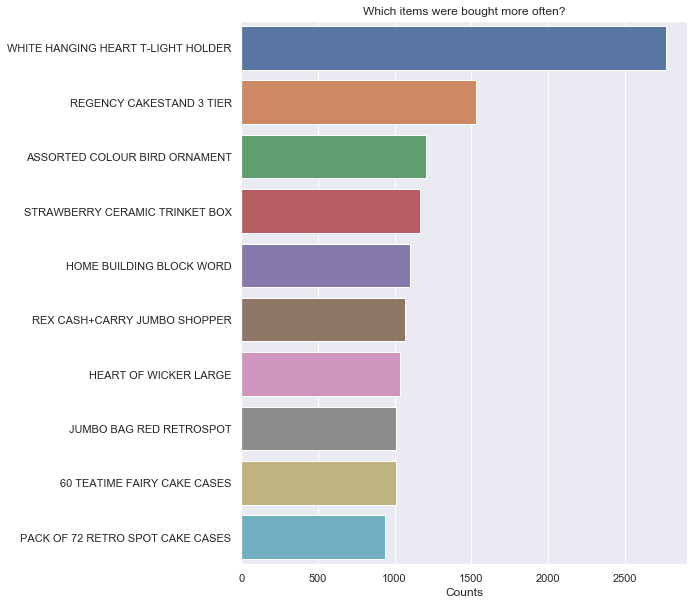

In [271]:
# Data 2010

# Persiapan Data
item_counts = df_10_join['Description'].value_counts().iloc[0:10]

# Setting ukuran plot
plt.figure(figsize=(8,10))

# Membuat chart
sns.barplot(item_counts.values, item_counts.index)

plt.xlabel("Counts")
plt.title("Which items were bought more often?");

Dari grafik tersebut dapat dilihat bahwa barang yang paling banyak di beli di tahun 2010 adalah White Hanging Hearty T-Light Holder

#### Bagaimana Perbandingan Penjualan Pria dan Wanita
Bar Chart

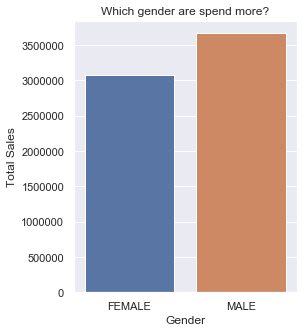

In [258]:
gender_sales = df_10_join['total_sales'].groupby(df_10_join['Gender']).sum()

gender_sales = pd.DataFrame(gender_sales)

# Setting ukuran plot
plt.figure(figsize=(4,5))

# Membuat chart
sns.barplot(gender_sales.index, gender_sales.total_sales)

plt.ylabel("Total Sales")
plt.title("Which gender are spend more?");

#### Bagaimana Total Penjualan dari Hari ke Hari
Line Chart

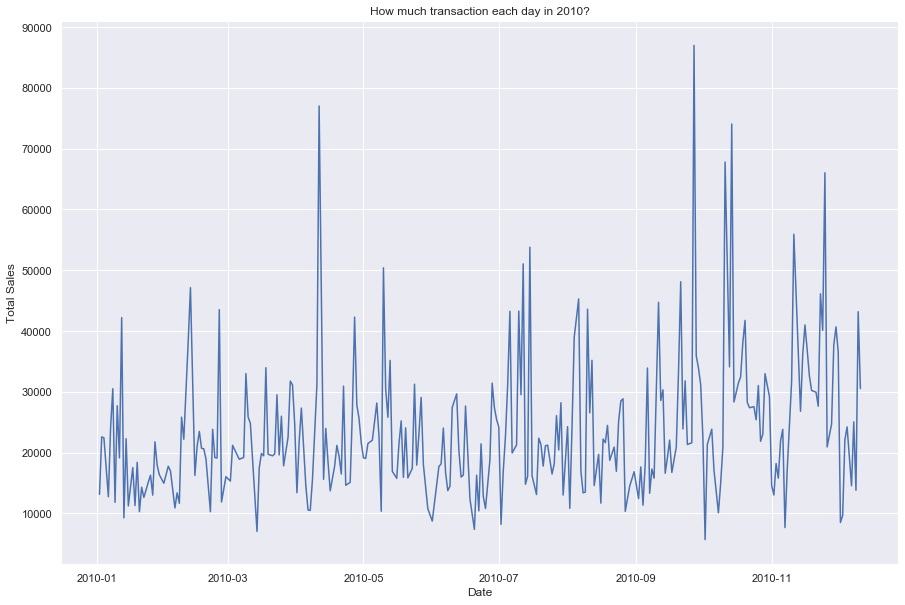

In [272]:
# Add date column
# df_10_join['Date'] = df_10_join['InvoiceDate'].apply(lambda x: x.date())

# df_10_join.head()
# Aggregate by Date
daily_sales = df_10_join.groupby(['Date']).agg({'total_sales':'sum'})

# Setting ukuran plot
plt.figure(figsize=(15,10))

# Membuat chart
sns.lineplot(x = daily_sales.index , y = daily_sales['total_sales'])
plt.ylabel("Total Sales")

plt.title("How much transaction each day in 2010?");

#### Hubungan Age dan Total Sales
Scatterplot

<Figure size 1080x720 with 0 Axes>

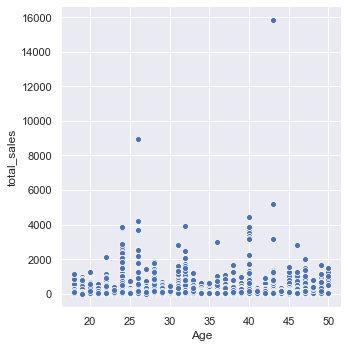

In [273]:
# Setting ukuran plot
plt.figure(figsize=(15,10))

sns.relplot(x="Age", y="total_sales", data=df_10_join)

plt.title("How much transaction each day in 2010?");

### 4. Kesimpulan

Pada sesi ini kita belajar dasar-dasar:
- Melakukan import data
- Melakukan pembersihan data
- Visualisasi data dengan menggunakan seaborn

Untuk belajar lebih lanjut mengenai seaborn dapat dilihat di web ini https://seaborn.pydata.org/index.html